In [53]:
import numpy as np
import matplotlib.pylab as plot
import fit_lc
from scipy.optimize import curve_fit
import fit_functions

<module 'fit_functions' from '/Users/jracusin/Swift/GRBfits/code/fit_functions.pyc'>

In [82]:
def fit_lightcurve(lc):
    det=np.where(lc['Ratepos']>0)
    tt=np.array([lc['Time'][det]+lc['T_-ve'][det],lc['Time'][det]+lc['T_+ve'][det]])
    t=np.array(lc['Time'])[det]
    rate=lc['Rate'][det]
    p0,yfit,pnames=fit_lc.lc_linfit(t,rate,[],norris=False)
    model,fmodel=fit_lc.fit_models(0,0,norris=False)
    popt, pcov=curve_fit(fmodel['int'+model],tt,rate,p0=p0,sigma=lc['Ratepos'][det])
    perr = np.sqrt(np.diag(pcov))
    print popt,perr
    chisq=sum(((yfit-rate)/lc['Ratepos'][det])**2)
    dof=len(rate)-len(p0)
    p=fit_lc.fit_params('pow',['norm','pow1'],[popt[0],popt[1]],perr,perr,chisq,dof)
    fit_lc.plot_lcfit(lc=lc,p=p)
    return p

[3.64080996 0.22394915] [0.70677099 0.01457664]
pow
0


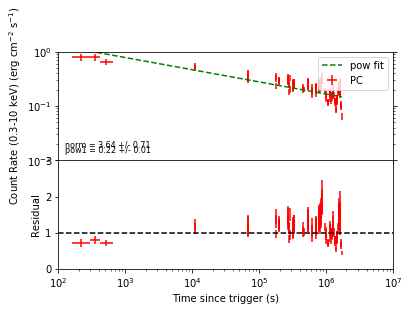

None


In [85]:
lc=fit_lc.read_lc(dir='/Users/jracusin/Desktop/GRBs/AT2018cow/')
p=fit_lightcurve(lc)
#fit_lc.plot_lcfit(lc=lc,p=p)

In [56]:
# Swift MET = 551097137.0, which corresponds to MJD=58288.438841 = 2018 Jun 19 at 10:31:55.845 UT.
# Discovery MJD 58285.441 == 2018-06-16 10:35:02 UTC - Atel 11727
# Limit from prior observations - 3.3 days before discovery - Atel 11742
day=86400.
dtdisc=(58288.438841-58285.441)*day
dtlim=3.3*day
print dtdisc, dtlim

259013.4624 285120.0


[8.92524471e+02 6.12779949e-01] [5.41904532e+02 4.40516847e-02]
pow
0


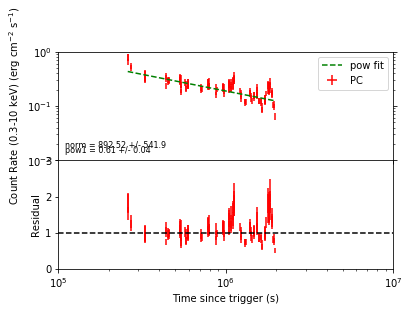

In [86]:
lc=fit_lc.read_lc(dir='/Users/jracusin/Desktop/GRBs/AT2018cow/')
lc['Time']=lc['Time']+dtdisc
#fit_lc.plot_lcfit(lc=lc)
p=fit_lightcurve(lc)

[1.98562003e+04 8.20905306e-01] [1.70486585e+04 6.10363775e-02]
pow
0


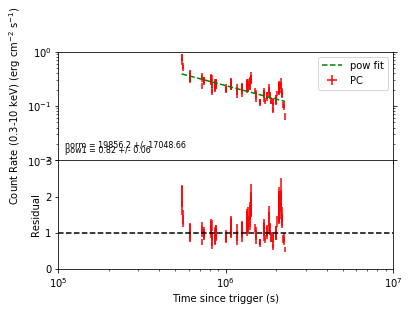

In [87]:
lc=fit_lc.read_lc(dir='/Users/jracusin/Desktop/GRBs/AT2018cow/')
lc['Time']=lc['Time']+dtdisc+dtlim
#fit_lc.plot_lcfit(lc=lc)
p=fit_lightcurve(lc)